<a href="https://colab.research.google.com/github/kavehkarimadini/ARC_101_Machine_Learning/blob/main/Perceptron_Exponential_Family_GLM_Softmax_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Perceptron vs. Logistic Function**
The perceptron and the logistic function are both fundamental components of neural networks, but they differ in how they process information and their ability to handle complex patterns.

| Feature | Perceptron | Logistic Function |
|---------|-----------|-------------------|
| **Activation Function** | Step Function (Threshold-based) | Sigmoid Function |
| **Output** | Binary (0 or 1) | Continuous (0 to 1) |
| **Differentiability** | Not differentiable | Differentiable |
| **Use Case** | Linearly separable problems | Non-linearly separable problems |

#### **Visualization of Perceptron vs. Logistic Function**
A perceptron makes hard decisions by setting a threshold, while the logistic function provides smooth probabilistic outputs.

##### **Perceptron (Step Function)**
$
f(z) =
\begin{cases}
1, & \text{if } z \geq 0 \\
0, & \text{if } z < 0
\end{cases}
$
This function immediately jumps from 0 to 1 at $ z = 0 $.

##### **Logistic Function (Sigmoid)**
$
\sigma(z) = \frac{1}{1 + e^{-z}}
$
This function smoothly transitions between 0 and 1, making it useful for gradient-based learning.

---

### **Mathematics Behind the Perceptron**
A perceptron computes a weighted sum of inputs and applies a threshold function:

$
z = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b
$

Where:
- $ x_i $ are the input features,
- $ w_i $ are the corresponding weights,
- $ b $ is the bias (threshold adjuster).

If $ z $ is greater than or equal to zero, the perceptron outputs 1; otherwise, it outputs 0.

---

### **Example Calculation**
#### **Given Inputs and Weights**
Suppose we have a perceptron with:
- Inputs: $ x_1 = 2 $, $ x_2 = 3 $
- Weights: $ w_1 = 0.5 $, $ w_2 = -0.6 $
- Bias: $ b = 0.1 $

#### **Step 1: Compute the Weighted Sum**
$
z = (0.5 \times 2) + (-0.6 \times 3) + 0.1
$

$
z = 1 - 1.8 + 0.1 = -0.7
$

#### **Step 2: Apply the Step Function**
Since $ z = -0.7 $ is less than 0, the perceptron outputs **0**.

---

### **Visualization**
Here’s a simple visualization of how the perceptron decision boundary looks compared to a logistic function:

1. **Perceptron:** Sharp boundary where inputs are strictly classified into 0 or 1.
2. **Logistic Function:** A smooth probability transition between classes.

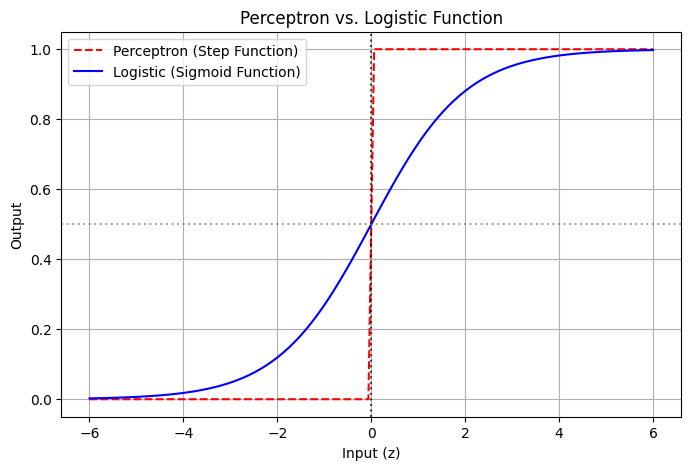

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define perceptron step function
def perceptron_activation(z):
    return np.where(z >= 0, 1, 0)

# Define logistic sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate input range
z = np.linspace(-6, 6, 100)

# Compute perceptron and sigmoid outputs
perceptron_output = perceptron_activation(z)
sigmoid_output = sigmoid(z)

# Plot the functions
plt.figure(figsize=(8, 5))
plt.plot(z, perceptron_output, label="Perceptron (Step Function)", linestyle='--', color='red')
plt.plot(z, sigmoid_output, label="Logistic (Sigmoid Function)", color='blue')

# Labels and legend
plt.axhline(0.5, color='gray', linestyle='dotted', alpha=0.7)
plt.axvline(0, color='black', linestyle='dotted', alpha=0.7)
plt.xlabel("Input (z)")
plt.ylabel("Output")
plt.title("Perceptron vs. Logistic Function")
plt.legend()
plt.grid()

# Show the plot
plt.show()

### **Exponential Family of Distributions**  
The **exponential family** is a broad class of probability distributions that can be written in the form:

$
p(x \mid \theta) = h(x) \exp \left( \eta(\theta) T(x) - A(\theta) \right)
$

Where:
- $ x $ is the observed data.
- $\theta $ is the parameter of the distribution.
- $ h(x) $ is the base measure (does not depend on $ \theta $).
- $ \eta(\theta)$ is the **natural parameter** or **canonical parameter**.
- $ T(x) $ is the **sufficient statistic**.
- $A(\theta) $ is the **log partition function** (ensures normalization).

This general form unifies many distributions, making it useful for statistical modeling.

---

## **Examples of the Exponential Family**
Let's show how the **Bernoulli** and **Gaussian (with fixed variance)** distributions fit into this framework.

### **1. Bernoulli Distribution**
The **Bernoulli** distribution models a binary outcome $ x \in \{0,1\} $ with probability $ p $:

$
p(x \mid p) = p^x (1 - p)^{1-x}
$

We need to transform this into the exponential family format.

#### **Step 1: Rewrite the Distribution**
Taking the logarithm:

$
\log p(x \mid p) = x \log p + (1-x) \log(1 - p)
$

Rearrange:

$
\log p(x \mid p) = x \log \frac{p}{1 - p} + \log(1 - p)
$

Comparing with the exponential family form:

$
p(x \mid \theta) = \exp \left( x \eta - A(\eta) \right)
$

We identify:
- **Natural parameter:** $\eta = \log \frac{p}{1 - p} $ (log-odds or logit function).
- **Sufficient statistic:** $ T(x) = x $.
- **Log partition function:** $ A(\eta) = -\log(1 + e^\eta) $.
- **Base measure:** $h(x) = 1 $ (constant).

Thus, the Bernoulli distribution belongs to the exponential family.

---

### **2. Gaussian Distribution (Fixed Variance = 1)**
The Gaussian (Normal) distribution with mean $ \mu $ and **fixed variance $\sigma^2 = 1 $** has the probability density function:

$
p(x \mid \mu) = \frac{1}{\sqrt{2\pi}} \exp \left( -\frac{(x - \mu)^2}{2} \right)
$

#### **Step 1: Expand the Exponent**
$
-\frac{(x - \mu)^2}{2} = -\frac{x^2}{2} + x\mu - \frac{\mu^2}{2}
$

Rewriting:

$
p(x \mid \mu) = \frac{1}{\sqrt{2\pi}} \exp \left( x \mu - \frac{\mu^2}{2} - \frac{x^2}{2} \right)
$

Comparing with the exponential family:

$
p(x \mid \theta) = h(x) \exp \left( T(x) \eta - A(\eta) \right)
$

We identify:
- **Natural parameter:** $ \eta = \mu $.
- **Sufficient statistic:** $ T(x) = x $.
- **Log partition function:** $ A(\eta) = \frac{\eta^2}{2} $.
- **Base measure:** $h(x) = \frac{1}{\sqrt{2\pi}} \exp(-x^2/2) $.

Thus, the Gaussian distribution with fixed variance belongs to the exponential family.

---

## **Properties of the Exponential Family**
1. **Sufficiency of $ T(x) $**  
   - The function $ T(x) $ is a sufficient statistic, meaning it captures all the necessary information about $ x $ to estimate $ \theta $.
   - This makes it useful for efficient parameter estimation.

2. **Convexity of Log Partition Function $ A(\theta) $**  
   - The function $ A(\theta) $ is convex, ensuring that optimization algorithms (e.g., maximum likelihood estimation) are stable.

3. **Moment Generating Function and Mean-Variance Relationship**  
   - The first derivative of $A(\eta) $ gives the expectation:
     $
     \mathbb{E}[T(X)] = A'(\eta)
     $
   - The second derivative gives the variance:
     $
     \text{Var}(T(X)) = A''(\eta)
     $
   - This helps in parameter estimation and statistical inference.

4. **Closure Under Sums**  
   - If $X_1, X_2, ..., X_n $ are i.i.d. from an exponential family distribution, the sum $S = \sum X_i $ also belongs to the same exponential family.

5. **Conjugate Priors in Bayesian Statistics**  
   - The exponential family often has **conjugate priors**, which simplify Bayesian inference. For example:
     - The **Beta** distribution is the conjugate prior for the **Bernoulli**.
     - The **Normal** distribution is the conjugate prior for itself.

---

## **Conclusion**
The exponential family provides a **unified** way to represent many distributions, making it essential in **machine learning, statistics, and Bayesian inference**. It simplifies parameter estimation and is the foundation of **generalized linear models (GLMs)**.

_______________________
Here’s a structured table that matches different types of data with appropriate distributions from the **exponential family** for modeling:

| **Type of Data**          | **Distribution**          | **Support** | **Sufficient Statistic $ T(x) $** | **Canonical Parameter $ \eta $** | **Log Partition Function $ A(\eta) $** |
|---------------------------|--------------------------|-------------|--------------------------------------|-----------------------------------|--------------------------------------|
| **Binary (0/1 outcomes)** | Bernoulli                | $ x \in \{0,1\} $ | $ x $ | $ \log \frac{p}{1 - p} $ | $ -\log(1 + e^\eta) $ |
| **Counts (0,1,2,...)**    | Poisson                  | $ x \in \mathbb{N} $ | $ x $ | $ \log \lambda $ | $ e^\eta $ |
| **Positive continuous**   | Exponential              | $ x > 0 $ | $ x $ | $ -\lambda $ | $ -\log(-\eta) $ |
| **Positive continuous**   | Gamma                    | $ x > 0 $ | $ \log x, x $ | $ (\alpha - 1, -\beta) $ | $ -\alpha \log(-\eta_2) $ |
| **Continuous (real-valued)** | Gaussian (fixed variance) | $ x \in \mathbb{R} $ | $ x $ | $ \mu $ | $ \frac{\eta^2}{2} $ |
| **Continuous (variance unknown)** | Gaussian (unknown variance) | $ x \in \mathbb{R} $ | $ x, x^2 $ | $ (\frac{\mu}{\sigma^2}, -\frac{1}{2\sigma^2}) $ | $ -\frac{\eta_1^2}{4\eta_2} - \frac{1}{2} \log(-2\eta_2) $ |
| **Proportions (0 to 1)**  | Beta                     | $ x \in (0,1) $ | $ \log x, \log (1 - x) $ | $ (\alpha - 1, \beta - 1) $ | $ \log \Gamma(\eta_1 + \eta_2) - \log \Gamma(\eta_1) - \log \Gamma(\eta_2) $ |
| **Categorical (K classes)** | Categorical (Multinoulli) | $ x \in \{1,2,\dots,K\} $ | $ x $ | $ \log p_k $ | $ \log \sum e^{\eta_k} $ |
| **Counts in multiple categories** | Multinomial             | $ x \in \mathbb{N}^K $ | $ x $ | $ \log p_k $ | $ \sum \log(1 + e^{\eta_k}) $ |

### **How to Use This Table**
- **Identify your data type:** If you have binary data, use **Bernoulli**. If you have counts, use **Poisson**, etc.
- **Find the exponential family formulation:** Each distribution has a corresponding **sufficient statistic**, **natural parameter**, and **log partition function** that fits the exponential family framework.
- **Generalized Linear Models (GLMs)** often use these distributions:
  - **Logistic regression** → Bernoulli (for classification).
  - **Poisson regression** → Poisson (for count data).
  - **Gamma regression** → Gamma (for positive continuous data).


We provide **input data** $ X $ to a GLM, which estimates **model parameters** $ \beta $. Then, the **linear predictor** (systematic component) is computed as:

$
\eta = X \beta
$

where:
- $ X $ is the **design matrix** (input features),
- $ \beta $ is the **coefficient vector** (learned parameters),
- $ \eta $ is the **natural parameter** (also called the canonical parameter in the exponential family).

Since GLMs assume the **response variable follows a distribution from the exponential family**, this natural parameter $ \eta $ plays a crucial role in determining the probability distribution of the response variable.

### **Additional Clarification**
1. **Why do we compute $ \eta = X \beta $?**
   - In exponential family distributions, the probability density (or mass) function can be written as:

     $
     p(y \mid \theta) = h(y) \exp \left( \eta(\theta) T(y) - A(\theta) \right)
     $

   - Here, $ \eta(\theta) $ (the natural parameter) controls how the data behaves. GLMs **learn $ \beta $ such that the model best fits the data**.

2. **What does $ \eta $ do in practice?**
   - Different distributions in the **exponential family** correspond to different natural parameters $ \eta $:
     - **Bernoulli (Logistic Regression)**: $ \eta = \log \frac{p}{1 - p} $ (log-odds).
     - **Poisson Regression**: $ \eta = \log \lambda $ (log-rate).
     - **Gaussian Regression (with variance fixed)**: $ \eta = \mu $ (mean).

3. **What if we don't want $ \eta $ directly?**
   - Instead of predicting $ \eta $ directly, we use a **link function** $ g(\mu) $ to ensure the response variable's expected value $ \mathbb{E}[Y] $ follows the right distribution.
   - The relationship between the expected response and the natural parameter is:

     $
     g(\mathbb{E}[Y]) = X \beta
     $

   - For example:
     - **Logistic regression** uses the **logit** function: $ g(p) = \log \frac{p}{1 - p} $.
     - **Poisson regression** uses the **log** function: $ g(\lambda) = \log \lambda $.
     - **Linear regression** uses the **identity** function: $ g(\mu) = \mu $.



## **Abstract Intuition of Generalized Linear Models (GLMs)**  

**Generalized Linear Models (GLMs)** extend linear regression by allowing:  
1. **Different types of response variables** (binary, counts, proportions, etc.).  
2. **A link function** that connects the linear predictors to the mean of the response variable.  
3. **Distributions from the exponential family** to model data variability.  

### **Three Key Components of GLMs**
1. **Random Component**  
   - Defines how the response variable $ Y $ is distributed, chosen from the **exponential family** (e.g., Bernoulli, Poisson, Gaussian).  

2. **Systematic Component**  
   - The linear predictor:  
     $
     \eta = X\beta
     $  
     where $ X $ is the input features and $ \beta $ is the coefficient vector.  

3. **Link Function**  
   - A transformation function $ g(\mu) $ that relates the expected value $ \mathbb{E}[Y] $ to the linear predictor:  
     $
     g(\mathbb{E}[Y]) = X\beta
     $  
   - Common **link functions**:
     - **Logit**: $ \log \frac{\mu}{1 - \mu} $ (for Bernoulli → logistic regression).
     - **Log**: $ \log \mu $ (for Poisson → count data).
     - **Identity**: $ \mu $ (for Gaussian → standard regression).

---

## **Code Example: Implementing 3 GLMs in Python**  
We will demonstrate:
1. **Logistic Regression** (for binary classification using the Bernoulli distribution).  
2. **Poisson Regression** (for count data).  
3. **Gamma Regression** (for positive continuous data).  

In [ ]:
# We use **statsmodels** and **scikit-learn** for implementation.

### **1. Logistic Regression (Binary Data, Bernoulli GLM)**
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Generate synthetic binary classification data
X, y = make_classification(n_samples=200, n_features=3, n_informative=2, n_redundant=1, random_state=42)
X = sm.add_constant(X)  # Add intercept

# Fit a logistic regression (Bernoulli GLM with logit link)
model_logistic = sm.GLM(y, X, family=sm.families.Binomial(link=sm.families.links.logit())).fit()

# Print summary
print(model_logistic.summary())
# 🔹 **Explanation:**
# - **Bernoulli distribution** models binary responses (0/1).
# - **Logit link function** ensures $ p(x) $ stays between 0 and 1.

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  200
Model:                            GLM   Df Residuals:                      197
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -68.555
Date:                Sun, 26 Jan 2025   Deviance:                       137.11
Time:                        06:11:47   Pearson chi2:                     240.
No. Iterations:                    21   Pseudo R-squ. (CS):             0.5038
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1258      0.220     -0.572      0.5

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The logit link alias is deprecated. Use Logit instead. The logit link alias will be removed after the 0.15.0 release.
  warnings.warn(


In [ ]:
### **2. Poisson Regression (Count Data, Poisson GLM)**
from sklearn.datasets import make_regression

# Generate synthetic count data
np.random.seed(42)
X = np.random.rand(200, 3)  # Features
y = np.random.poisson(lam=np.exp(1 + X @ np.array([0.5, -0.3, 0.8])), size=200)  # Poisson-distributed response
X = sm.add_constant(X)  # Add intercept

# Fit Poisson regression (Poisson GLM with log link)
model_poisson = sm.GLM(y, X, family=sm.families.Poisson(link=sm.families.links.log())).fit()

# Print summary
print(model_poisson.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  200
Model:                            GLM   Df Residuals:                      196
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -421.38
Date:                Sun, 26 Jan 2025   Deviance:                       200.37
Time:                        06:12:53   Pearson chi2:                     194.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.3050
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0468      0.104     10.030      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


In [ ]:
### **3. Gamma Regression (Positive Continuous Data, Gamma GLM)**
# Generate synthetic positive continuous data
np.random.seed(42)
X = np.random.rand(200, 2)
y = np.random.gamma(shape=2, scale=np.exp(1 + X @ np.array([0.3, 0.6])), size=200)  # Gamma-distributed response
X = sm.add_constant(X)  # Add intercept

# Fit Gamma regression (Gamma GLM with log link)
model_gamma = sm.GLM(y, X, family=sm.families.Gamma(link=sm.families.links.log())).fit()

# Print summary
print(model_gamma.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  200
Model:                            GLM   Df Residuals:                      197
Model Family:                   Gamma   Df Model:                            2
Link Function:                    log   Scale:                         0.53206
Method:                          IRLS   Log-Likelihood:                -604.83
Date:                Sun, 26 Jan 2025   Deviance:                       110.56
Time:                        06:14:14   Pearson chi2:                     105.
No. Iterations:                    11   Pseudo R-squ. (CS):             0.1122
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6794      0.131     12.855      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


## **Summary of GLMs and Their Uses**
| **GLM Type**           | **Response Variable Type** | **Distribution** | **Link Function** |
|------------------------|---------------------------|-----------------|-----------------|
| **Logistic Regression** | Binary (0/1)              | Bernoulli       | Logit ($ \log \frac{p}{1 - p} $) |
| **Poisson Regression**  | Count (0,1,2,...)         | Poisson         | Log ($ \log \lambda $) |
| **Gamma Regression**    | Positive continuous       | Gamma           | Log ($ \log \mu $) |

---

## **Takeaways**
- **GLMs extend linear regression** to handle different types of response variables.  
- **The choice of distribution and link function depends on the data type.**  
- **GLMs unify many classical models** (e.g., logistic regression, Poisson regression).

_______________________________________________
_____________________
### Softmax Regression: A Mathematical Approach

Softmax regression (also known as multinomial logistic regression) is used for multi-class classification problems. Let's break it down step by step, starting from **cross-entropy loss**.

#### 1. Cross-Entropy Loss
Cross-entropy is a loss function that measures the dissimilarity between two probability distributions. Given a true class label $ y $ and a predicted probability distribution $ \hat{y} $, the cross-entropy loss is:

$
L = - \sum_{i=1}^{C} y_i \log (\hat{y}_i)
$

where:
- $ C $ is the number of classes,
- $ y_i $ is 1 if the sample belongs to class $ i $, otherwise 0,
- $ \hat{y}_i $ is the predicted probability for class $ i $.

For a single sample, if the true class is $ k $, the loss simplifies to:

$
L = -\log (\hat{y}_k)
$

#### 2. Softmax Function
To convert raw scores (logits) into probabilities, we use the softmax function:

$
\hat{y}_i = \frac{e^{z_i}}{\sum_{j=1}^{C} e^{z_j}}
$

where:
- $ z_i $ is the raw output (logit) for class $ i $,
- $ e^{z_i} $ ensures that outputs are positive,
- The denominator normalizes the values so they sum to 1.

#### 3. Gradient Descent and Optimization
The softmax regression model learns parameters $ W $ and $ b $ to minimize cross-entropy loss:

$
Z = WX + b
$

where $ X $ is the input data. The optimization is performed using gradient descent with derivatives of the loss function.

---

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


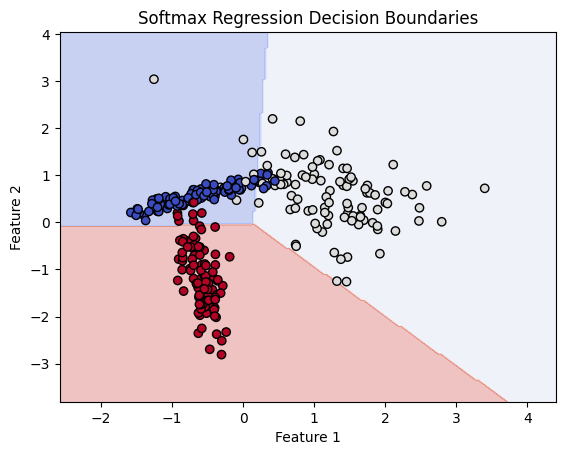

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate a synthetic dataset (3 classes)
X, y = make_classification(n_samples=300, n_features=2, n_classes=3, n_clusters_per_class=1, n_redundant=0, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train softmax regression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X, y)

# Visualization of decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
plt.title("Softmax Regression Decision Boundaries")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Explanation of the Code:
# 1. **Generate synthetic data** with three classes.
# 2. **Standardize the features** to improve optimization.
# 3. **Train a softmax regression model** using `LogisticRegression` from `sklearn`.
# 4. **Visualize the decision boundaries** by predicting over a grid and using `contourf`.